### Formative Assessment ( Data Preprocessing )

#### Data Exploration:
Steps:

1.Load the dataset and examine its structure. 
2.List down unique values in each feature and find their lengths. 
3.Perform statistical analysis (mean, median, mode, standard deviation) of numerical columns. 
4.Rename columns for clarity if necessary.

In [25]:
# LOADING THE DATASET

import pandas as pd
import numpy as np

# Load dataset
url = 'https://drive.google.com/uc?id=1F3lRf32JM8ejnXq-Cbf9y7fa57zSHGz_'
data = pd.read_csv(url)

# Display the first few rows of the dataset
data.head()


,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0


In [28]:
#Data Exploration

# List unique values and their counts for each column
unique_values = {col: data[col].unique() for col in data.columns}
unique_lengths = {col: len(data[col].unique()) for col in data.columns}

# Perform statistical analysis
stats = data.describe()

# Rename columns if necessary
data.rename(columns={'OldName': 'NewName'}, inplace=True)  

print("Done Statistical Analysis and Ranaming")

Done Statistical Analysis and Ranaming


#### Data Cleaning

Steps:

1.Identify and treat missing values.
2.Use methods such as removal, replacement with mean/median/mode, or imputation techniques.
3.Remove duplicate rows to ensure data uniqueness.
4.Identify and handle outliers using methods like Z-score, IQR, or domain knowledge.
5.Replace age value 0 with NaN.
6.Consistently treat null values across all columns.

In [29]:
# Handling missing values
data.fillna(data.mean(), inplace=True)  # Example: Replacing with mean

# Remove duplicate rows
data.drop_duplicates(inplace=True)

# Identify and handle outliers (example using Z-score)
from scipy.stats import zscore
outliers = np.abs(zscore(data.select_dtypes(include=np.number))) > 3
data = data[(~outliers).all(axis=1)]

# Replace age value 0 with NaN
data['Age'].replace(0, np.nan, inplace=True)

# Further treat null values
data['Age'].fillna(data['Age'].median(), inplace=True)  # Example: Replacing with median


TypeError: can only concatenate str (not "int") to str

#### Data Analysis
Steps:

1.Filter the dataset for rows where age > 40 and salary < 5000.
2.Plot a chart to visualize the relationship between age and salary.
3.Count the number of people from each place and represent it visually using bar charts or pie charts.

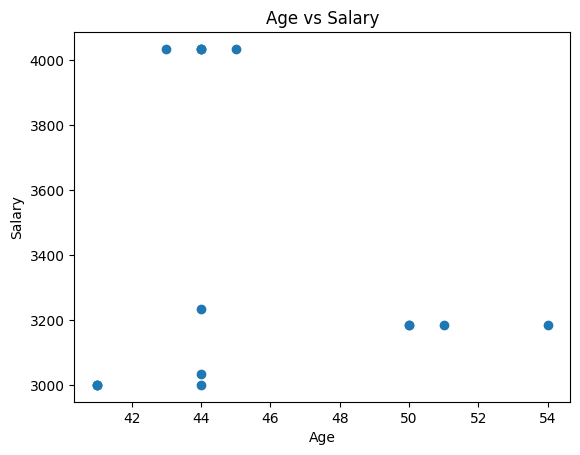

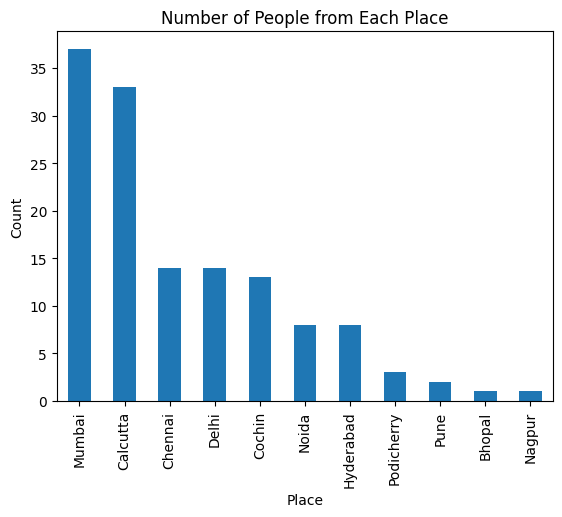

In [15]:
# Filter data
filtered_data = data[(data['Age'] > 40) & (data['Salary'] < 5000)]

# Plot chart: Age vs Salary
import matplotlib.pyplot as plt

plt.scatter(filtered_data['Age'], filtered_data['Salary'])
plt.xlabel('Age')
plt.ylabel('Salary')
plt.title('Age vs Salary')
plt.show()

# Count number of people from each place and plot
place_counts = data['Place'].value_counts()
place_counts.plot(kind='bar')
plt.xlabel('Place')
plt.ylabel('Count')
plt.title('Number of People from Each Place')
plt.show()

#### Data Encoding
Steps:

1.Convert categorical variables to numerical values using:
2.One-hot encoding: Create binary columns for each category.
3.Label encoding: Convert categories to integer labels.

In [30]:
# One-hot encoding for categorical variables
data_encoded = pd.get_dummies(data, columns=['categorical_column1', 'categorical_column2'])

# Label encoding for categorical variables
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
data['categorical_column'] = label_encoder.fit_transform(data['categorical_column'])

KeyError: "None of [Index(['categorical_column1', 'categorical_column2'], dtype='object')] are in the [columns]"

#### Feature Scaling
Steps:

1.After encoding categorical variables, scale the features using:
2.StandardScaler: Standardize features by removing the mean and scaling to unit variance.
3.MinMaxScaler: Scale features to a given range, typically 0 to 1.

In [31]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Standard scaling
scaler = StandardScaler()
data_standard_scaled = scaler.fit_transform(data.select_dtypes(include=np.number))

# Min-Max scaling
min_max_scaler = MinMaxScaler()
data_min_max_scaled = min_max_scaler.fit_transform(data.select_dtypes(include=np.number))

print("FEATSCALING DONE!")

SCALING DONE!
